In [1]:
from __future__ import print_function
import torch
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn .functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Initialisation des constantes
batch_size = 128
num_classes = 10
epochs= 20
learning_rate = 0.001

In [3]:
# Chargement des données
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
mnist_train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_train_loader = torch.utils.data.DataLoader(mnist_train_set, batch_size=batch_size, shuffle=True)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_set, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 53247240.02it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 11867903.77it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 31856520.86it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5427501.07it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
print(mnist_train_loader)

In [5]:
class Net(nn.Module): # On definit le reseau
    def __init__(self): # On definit les couches
        super(Net, self).__init__() # On herite de la classe Module
        self.fc1 = nn.Linear(784, 500) # On definit la premiere couche lineaire (500 neurones)
        self.fc2 = nn.Linear(500, 500) # On definit la deuxieme couche lineaire (500 neurones)
        self.fc3 = nn.Linear(500, num_classes) # On definit la troisieme couche lineaire (10 neurones)

    def forward(self, x): # On definit la fonction forward qui calcule les sorties du reseau
        out = self.fc1(x) # On calcule la sortie de la premiere couche
        out = F.relu(out) # On applique la fonction d'activation relu
        out = F.dropout(out, p=0.2, training=self.training) # On applique le dropout
        out = self.fc2(out) # On calcule la sortie de la deuxieme couche
        out = F.relu(out) # On applique la fonction d'activation relu
        out = F.dropout(out, p=0.2, training=self.training) # On applique le dropout
        out = self.fc3(out) # On calcule la sortie de la troisieme couche
        return F.log_softmax(out, dim=1) # On applique la fonction d'activation softmax

In [6]:
MLP = Net() # Initialisation du reseau de neurones MLP

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(MLP.parameters(), lr=learning_rate) # Choix de l'optimiseur RMSprop

In [7]:
list_loss_train = [] # Liste de loss pour l'entrainement
list_accuracy_train = [] # Liste d'accuracy pour l'entrainement
list_loss_test = [] # Liste de loss pour le test
list_accuracy_test = [] # Liste d'accuracy pour le test

y_pred_list = []
y_true_list = []

for epoch in range(epochs): # On parcourt les differentes epochs
    MLP.train() # On met le reseau en mode train
    sous_list_loss_train = [] # On initialise une liste pour stocker les loss
    sous_valeur_accuracy_train = 0 # On initialise une variable pour stocker le nombre de bonnes predictions
    for inputs_train, labels_train in mnist_train_loader: # On parcourt les batchs du dataset
        optimizer.zero_grad() # On met les gradients a zero
        outputs = MLP(inputs_train.view(-1, 784)) # On calcule les sorties du reseau
        loss = criterion(outputs, labels_train) # On calcule la loss
        loss.backward() # On retropropage la loss
        optimizer.step() # On met a jour les parametres

        sous_list_loss_train.append(loss.item()) # On ajoute la loss a la liste
        _, predicted = torch.max(outputs, 1) # On recupere les predictions
        correct = (predicted == labels_train).sum().item() # On calcule le nombre de bonnes predictions
        sous_valeur_accuracy_train += correct # On ajoute ce nombre a la variable

    list_accuracy_train.append(sous_valeur_accuracy_train / len(mnist_train_set)) # On ajoute la precision moyenne a la liste

    list_loss_train.append(np.mean(sous_list_loss_train)) # On ajoute la loss moyenne a la liste

        MLP.eval() # On met le reseau en mode evaluation
        with torch.no_grad(): # On desactive le calcul des gradients
            sous_list_loss_test = [] # On initialise une liste pour stocker les loss
            sous_valeur_accuracy_test = 0 # On initialise une variable pour stocker le nombre de bonnes predictions
            for inputs_test, labels_test in mnist_test_loader: # On parcourt les batchs du dataset de test
                test_outputs = MLP(inputs_test.view(-1, 784)) # On calcule les sorties du reseau
                loss = criterion(test_outputs, labels_test) # On calcule la loss
                sous_list_loss_test.append(loss.item()) # On ajoute la loss a la liste
                _, predicted = torch.max(test_outputs, 1) # On recupere les predictions
                correct = (predicted == labels_test).sum().item() # On calcule le nombre de bonnes predictions

                y_pred_list.extend(predicted) # On ajoute les predictions a la liste
                y_true_list.extend(labels_test) # On ajoute les vraies valeurs a la liste

                sous_valeur_accuracy_test += correct # On ajoute ce nombre a la variable
            list_accuracy_test.append(sous_valeur_accuracy_test / len(mnist_test_set)) # On ajoute la precision moyenne a la liste
            list_loss_test.append(np.mean(sous_list_loss_test)) # On ajoute la loss moyenne a la liste

In [8]:
print(list_loss_train)
print(list_loss_test)

[0.2740756772410895, 0.11677963314041781, 0.08843932796055193, 0.0718976087095752, 0.06090104609612685, 0.05431595386347489, 0.048432234070027495, 0.04245275000955707, 0.03990287080926916, 0.03619139426465291, 0.035929905915402495, 0.030882107430920333, 0.032747417650640265, 0.030741802185524636, 0.02870424036074977, 0.029401126767765344, 0.027047960907249386, 0.02706443343330413, 0.025759766860186176, 0.02472034498290191]
[0.19751428101871965, 0.08422474000570541, 0.07537193549428536, 0.07123156909976756, 0.0675375892713856, 0.061858951266222456, 0.07208323308818936, 0.0698903052223389, 0.07352893091878217, 0.0743067656320346, 0.07293333946374701, 0.07813822979553924, 0.07698565503280314, 0.06787105333914721, 0.07268316845212756, 0.07560092428723222, 0.08863352146503058, 0.10278442651861905, 0.08511145266620922, 0.09378749064767204]


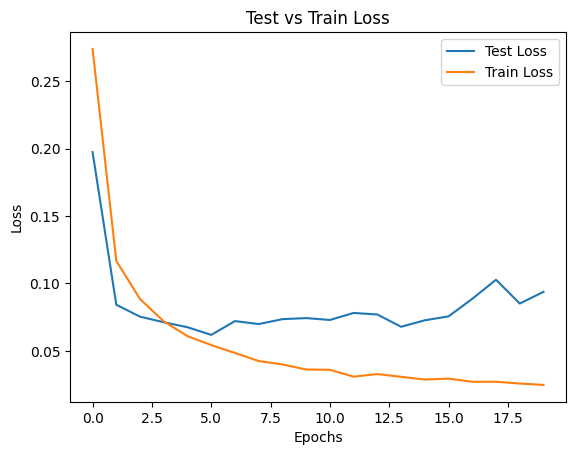

In [9]:
# Affichage des courbes de la loss pour le train et le test
plt.plot(list_loss_test, label='Test Loss')
plt.plot(list_loss_train, label='Train Loss')

plt.title('Test vs Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

In [10]:
print(list_accuracy_train)
print(list_accuracy_test)

[0.92105, 0.9645333333333334, 0.9723, 0.9770666666666666, 0.9809, 0.9830166666666666, 0.98485, 0.9862, 0.9875666666666667, 0.9880166666666667, 0.9883666666666666, 0.9898333333333333, 0.9900166666666667, 0.9904833333333334, 0.9913666666666666, 0.9912833333333333, 0.99175, 0.9917166666666667, 0.9920333333333333, 0.9922333333333333]
[0.9391, 0.9742, 0.9773, 0.9792, 0.9795, 0.982, 0.9798, 0.9817, 0.9816, 0.9815, 0.9826, 0.9815, 0.9824, 0.9836, 0.9843, 0.9835, 0.9828, 0.9794, 0.9832, 0.9805]


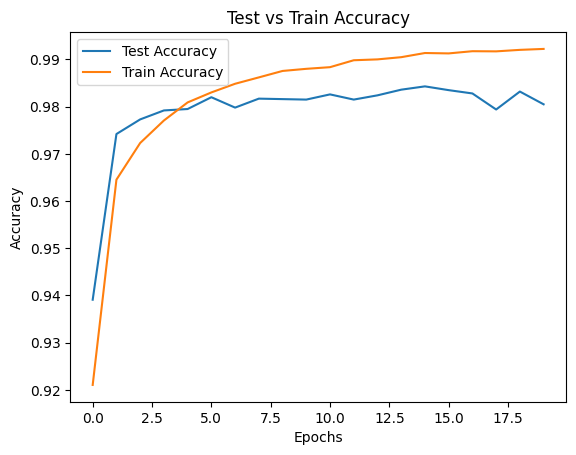

In [11]:
# Affichage des courbes de l'accuracy pour le train et le test
plt.plot(list_accuracy_test, label='Test Accuracy')
plt.plot(list_accuracy_train, label='Train Accuracy')

plt.title('Test vs Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

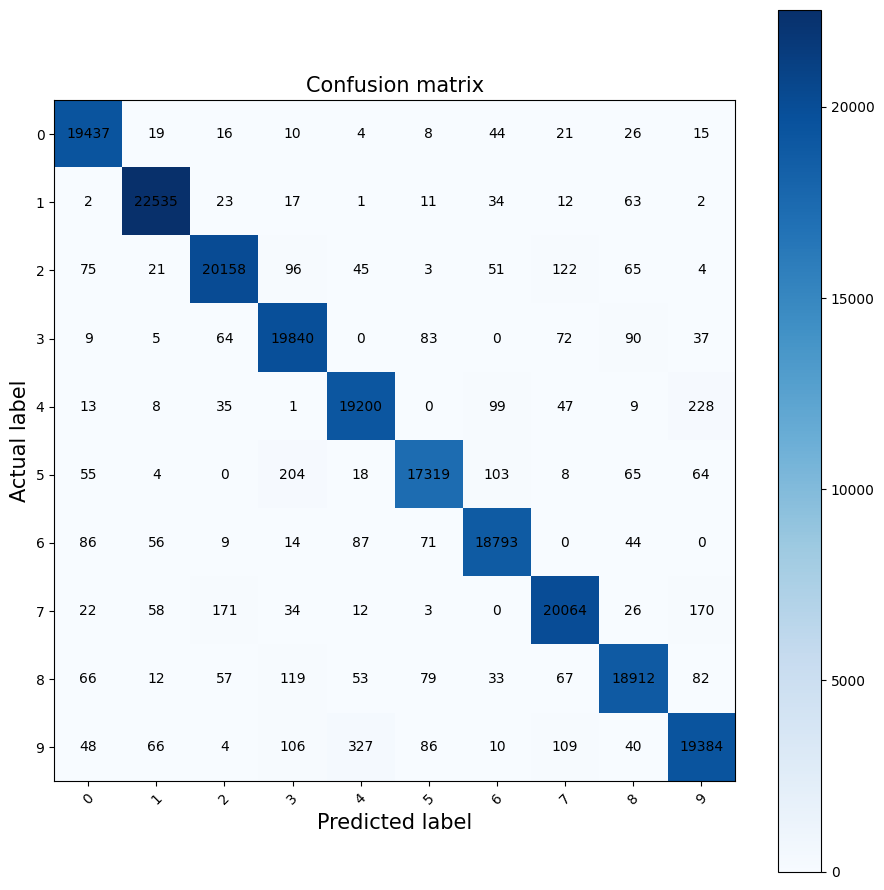

In [ ]:
# Affichage de la matrice de confusion
import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_true_list, y_pred_list)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x),
  horizontalalignment='center',
  verticalalignment='center')
plt.show()